In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

* Hedef :
  * r2 >= 0,8
  * RMSE < 100k $

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# seperate id and date column to another df2

df2 = df[['id', 'date']]
df2.head()
# drop id and date column from df

df.drop(['id', 'date'], axis=1, inplace=True)




In [7]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.correlation = df.corr()

In [9]:
abs(df.correlation['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode          0.053203
Name: price, dtype: float64

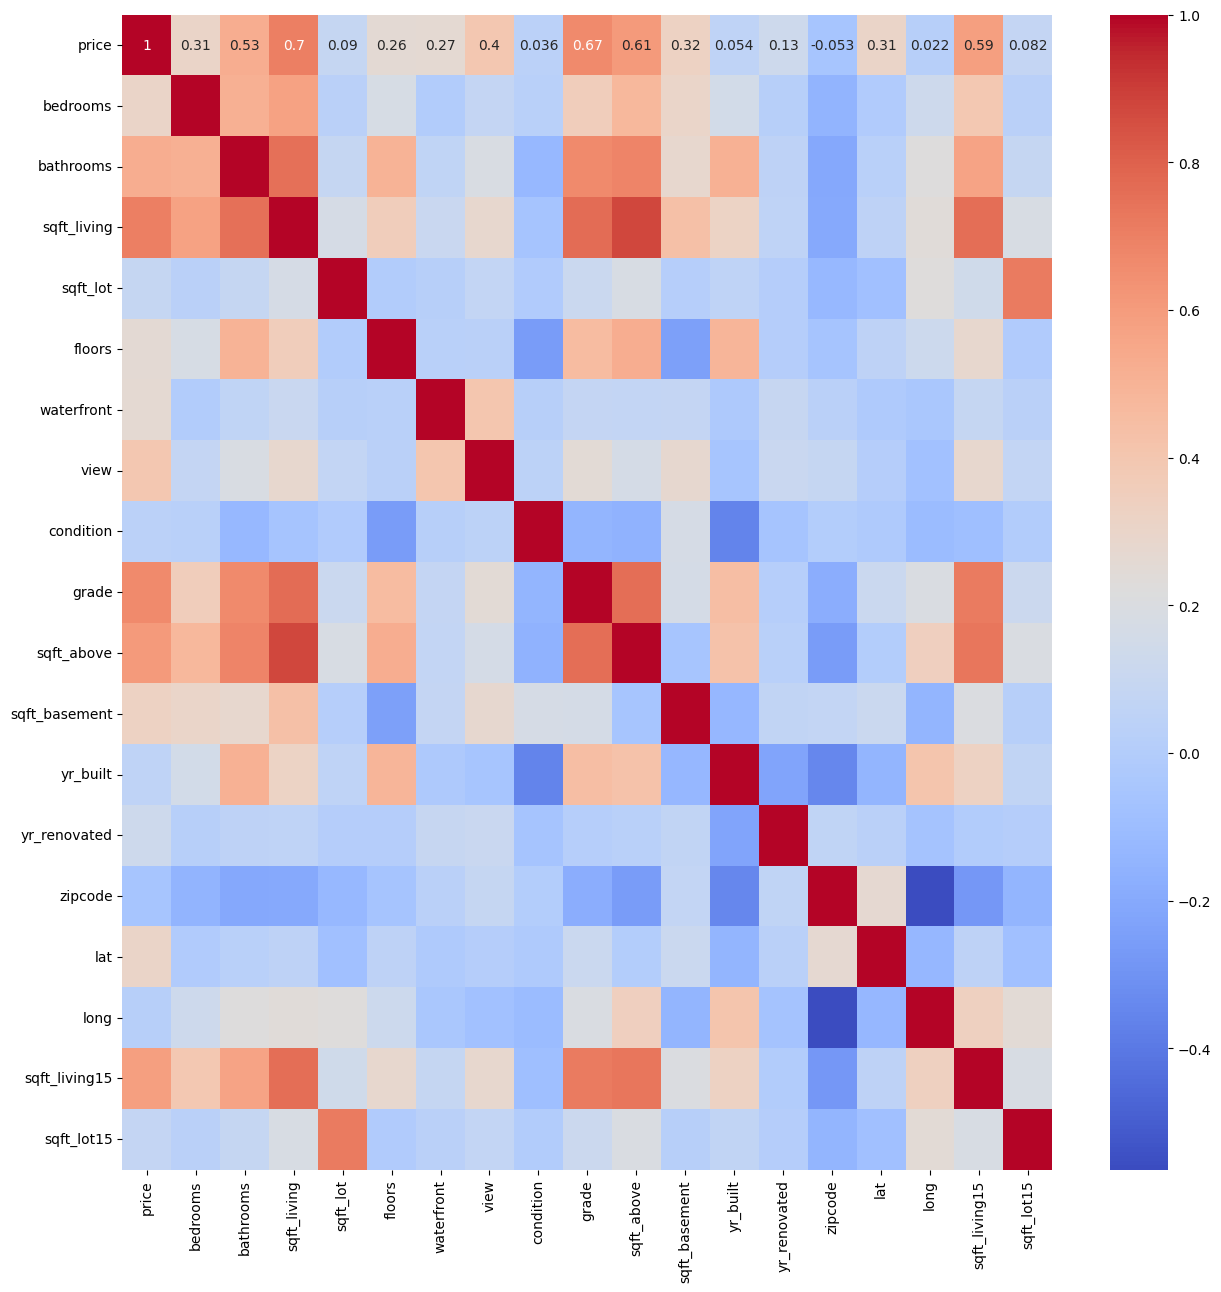

In [10]:
#plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

* sqft_living      0.702035
* grade            0.667434
* sqft_above       0.605567
* sqft_living15    0.585379
* bathrooms        0.525138
* view             0.397293
* sqft_basement    0.323816
* bedrooms         0.308350
* lat              0.307003
* waterfront       0.266369

In [11]:
# train and test with columns that have correlation > 0.25
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat' ]]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p)*100)
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [13]:
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,7.433013e+01,1.969946e+05,9.914907e+04
XGBRegressor,6.941055e+01,2.150445e+05,9.845736e+04
Lasso,6.403836e+01,2.331644e+05,1.396135e+05
Ridge,6.403740e+01,2.331675e+05,1.396008e+05
Linear,6.403289e+01,2.331821e+05,1.393423e+05
Decision Tree,5.973127e+01,2.467325e+05,1.259783e+05
ElasticNet,5.670686e+01,2.558303e+05,1.611238e+05
mlp_regressor,5.106993e+01,2.719759e+05,1.724680e+05
AdaBoost,5.030080e+01,2.741051e+05,1.734731e+05
KNeighborsRegressor,4.830690e+01,2.795495e+05,2.090582e+05


In [14]:
df["age"] = 2024 - df["yr_built"]

In [15]:
df["renovation_age"] = 2024 - df["yr_renovated"]


In [16]:

X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'age', 'renovation_age']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,7.599956e+01,1.904812e+05,9.415433e+04
XGBRegressor,7.344683e+01,2.003552e+05,9.292646e+04
Lasso,6.686684e+01,2.238071e+05,1.318900e+05
Ridge,6.686561e+01,2.238112e+05,1.318838e+05
Linear,6.685605e+01,2.238435e+05,1.315961e+05
ElasticNet,6.094918e+01,2.429727e+05,1.500279e+05
Extra Tree,5.843280e+01,2.506789e+05,1.236071e+05
Decision Tree,5.674246e+01,2.557251e+05,1.254239e+05
mlp_regressor,5.447925e+01,2.623295e+05,1.664427e+05
AdaBoost,5.248739e+01,2.680075e+05,1.670384e+05


In [18]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]


In [19]:
df["zipcode"] = df["zipcode"].astype("object")

In [20]:
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'age', 'renovation_age', 'total_rooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [21]:
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,7.606271e+01,1.902304e+05,9.455308e+04
XGBRegressor,7.465514e+01,1.957435e+05,9.294596e+04
Lasso,6.686685e+01,2.238071e+05,1.318901e+05
Ridge,6.686560e+01,2.238113e+05,1.318839e+05
Linear,6.685615e+01,2.238432e+05,1.316434e+05
ElasticNet,6.095852e+01,2.429437e+05,1.500393e+05
Decision Tree,5.585769e+01,2.583271e+05,1.257191e+05
mlp_regressor,5.523412e+01,2.601453e+05,1.651806e+05
AdaBoost,5.249104e+01,2.679972e+05,1.670170e+05
Extra Tree,4.945181e+01,2.764364e+05,1.322066e+05


In [22]:
#corr 
abs(df.corr()['price']).sort_values(ascending=False)

price             1.000000
sqft_living       0.702035
grade             0.667434
sqft_above        0.605567
sqft_living15     0.585379
bathrooms         0.525138
total_rooms       0.466319
view              0.397293
sqft_basement     0.323816
bedrooms          0.308350
lat               0.307003
waterfront        0.266369
floors            0.256794
renovation_age    0.126434
yr_renovated      0.126434
sqft_lot          0.089661
sqft_lot15        0.082447
age               0.054012
yr_built          0.054012
zipcode           0.053203
condition         0.036362
long              0.021626
Name: price, dtype: float64

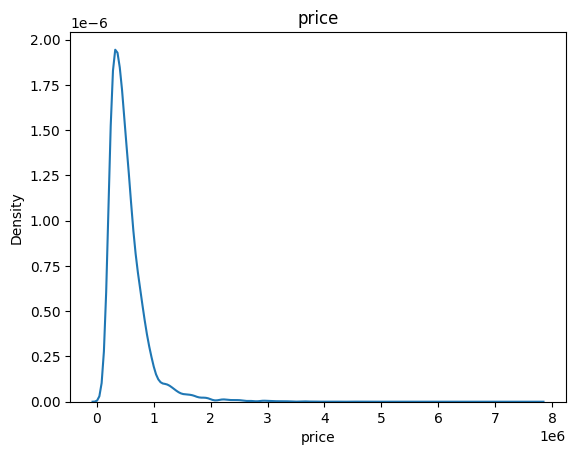

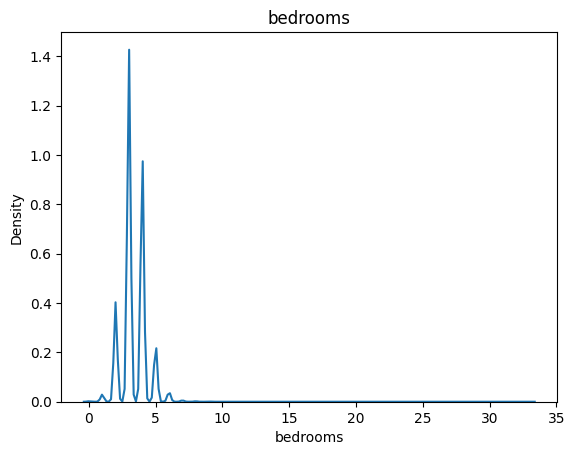

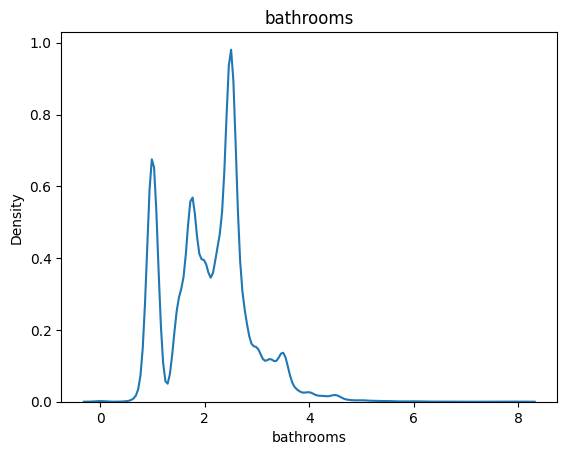

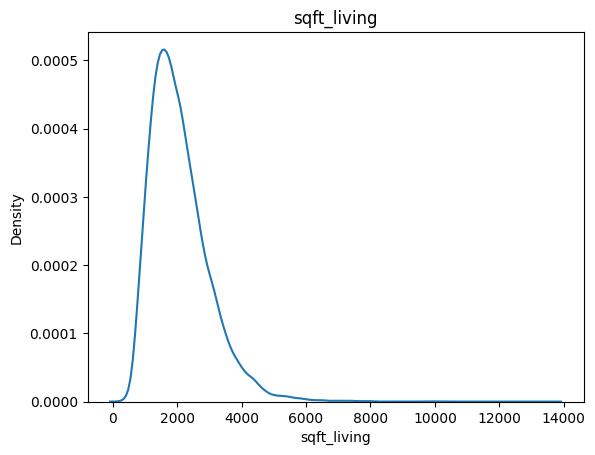

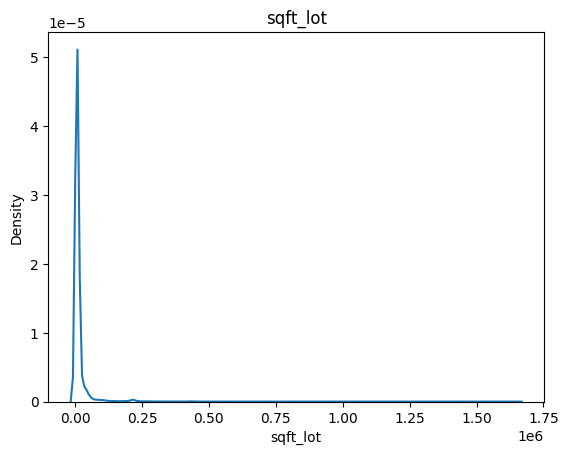

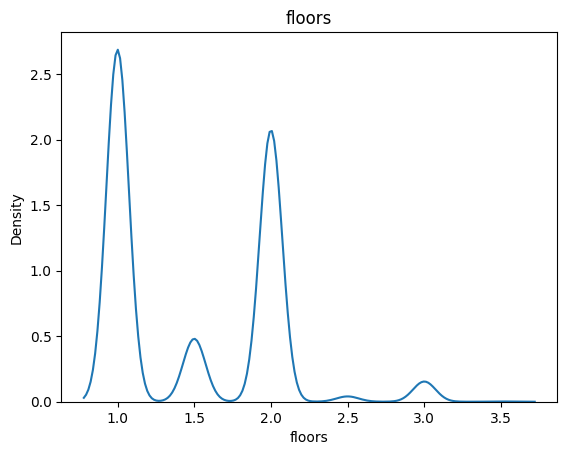

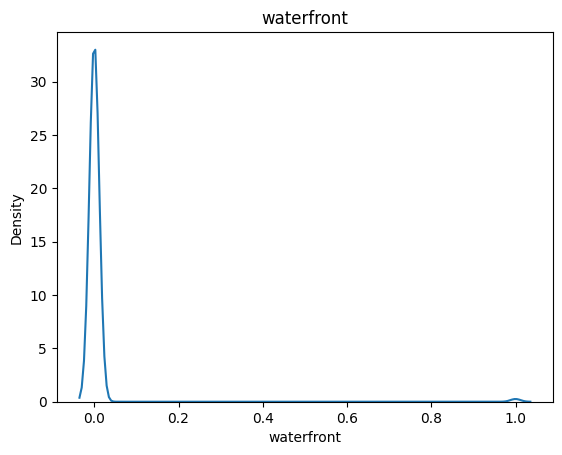

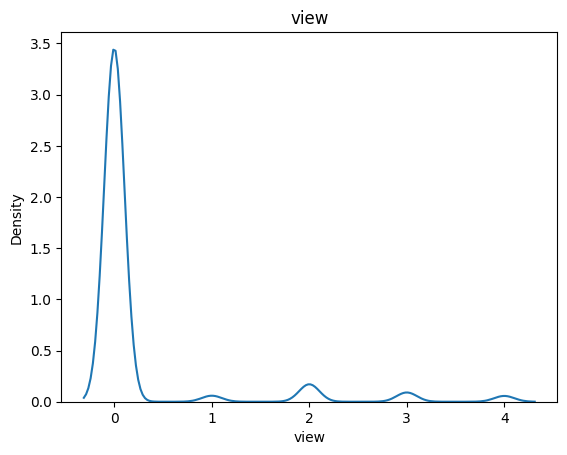

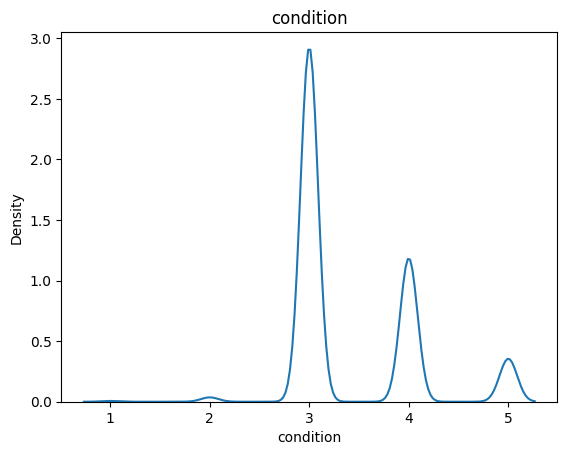

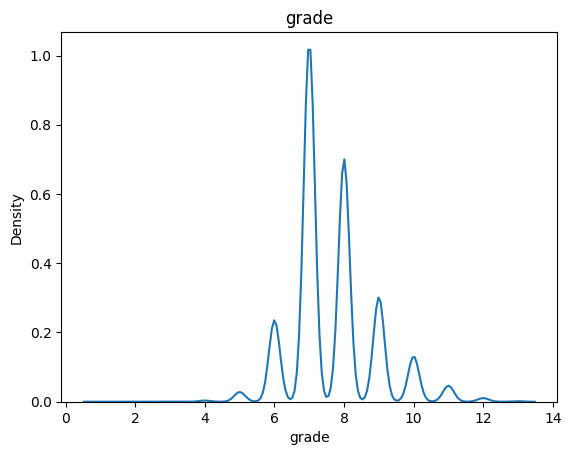

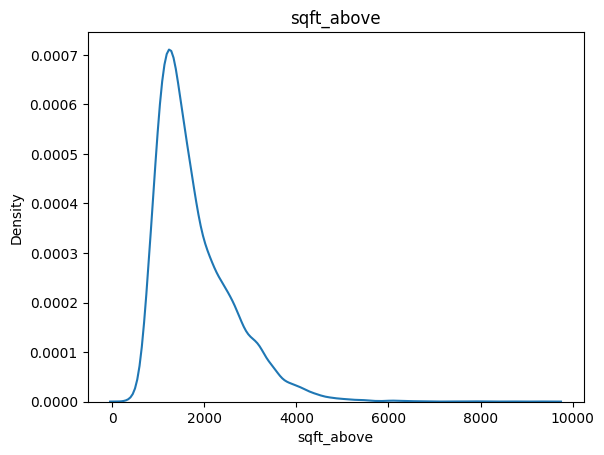

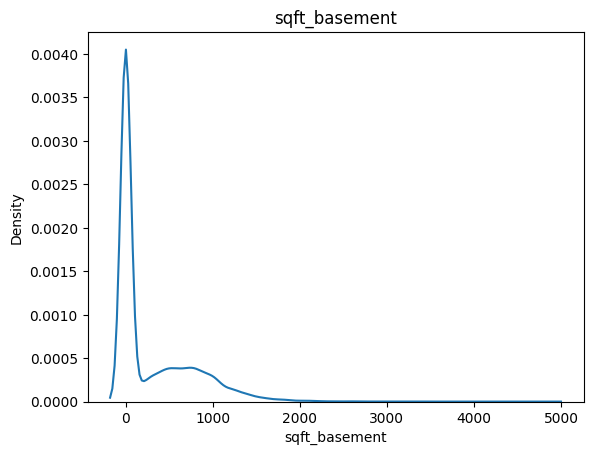

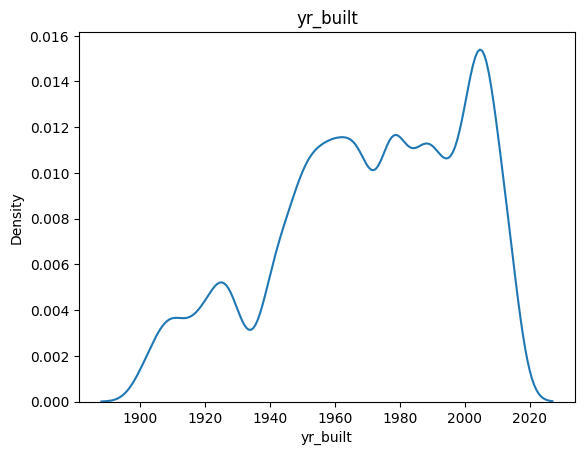

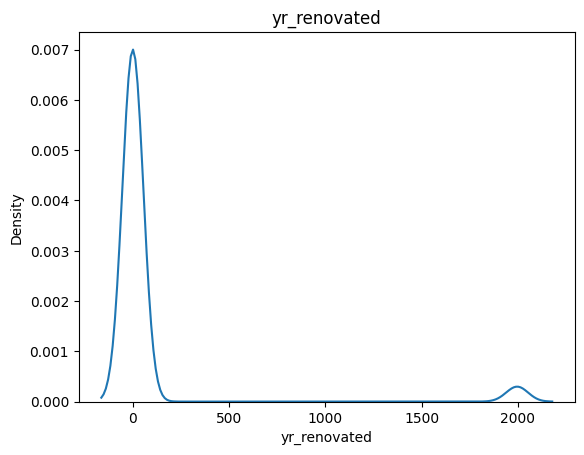

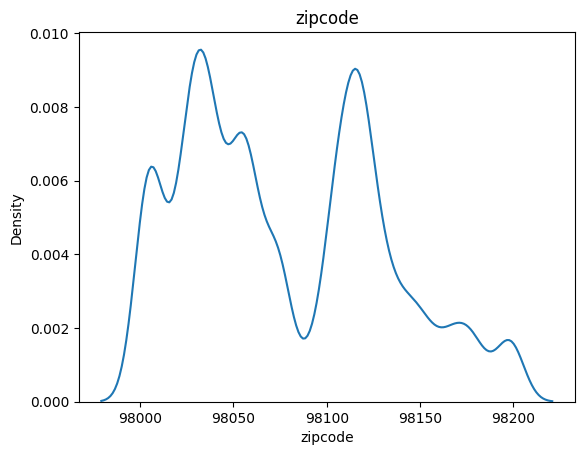

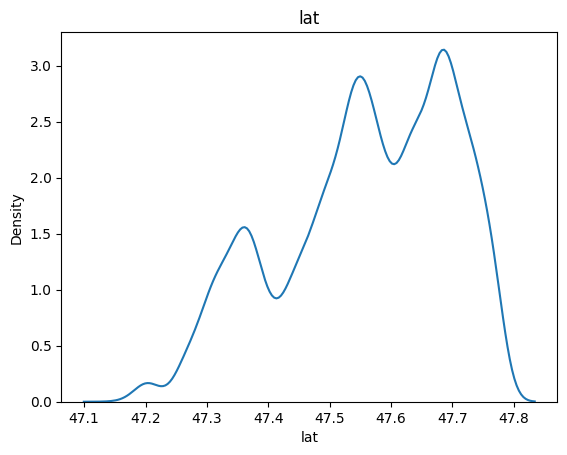

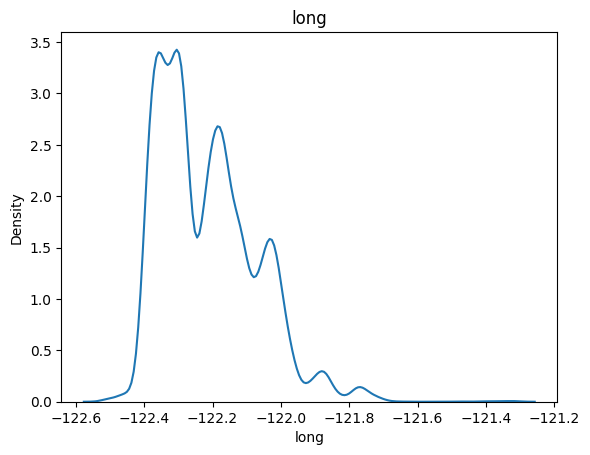

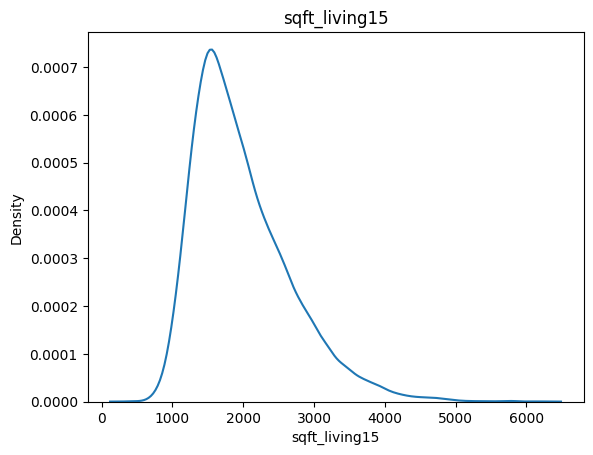

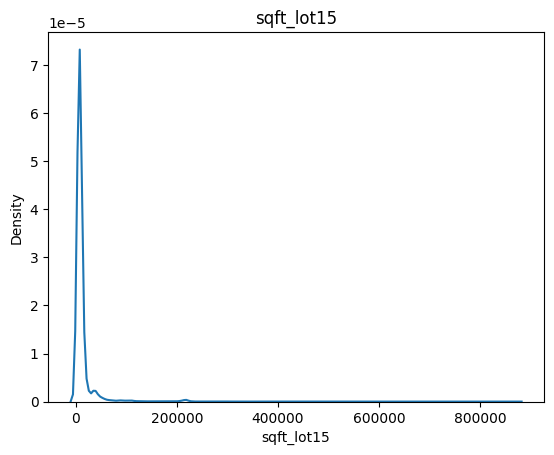

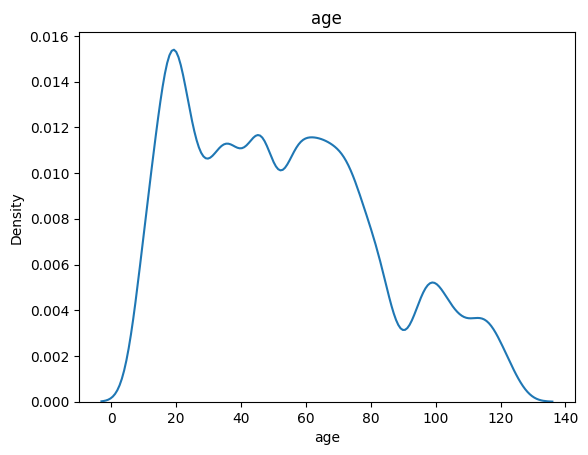

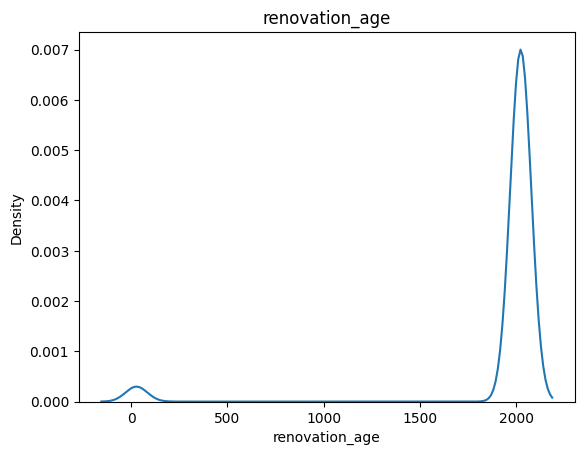

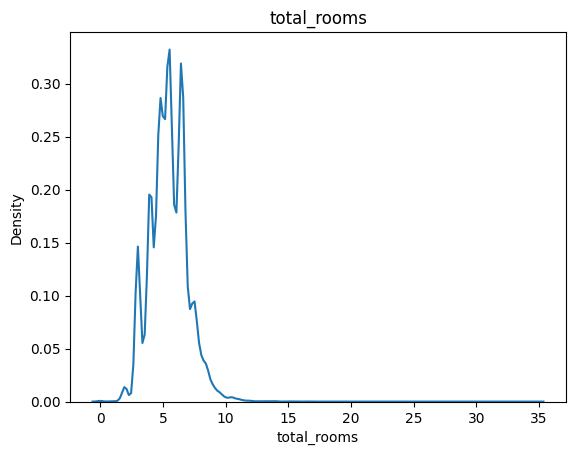

In [23]:
#kde plot every column
for i in df.columns:
    sns.kdeplot(df[i])
    plt.title(i)
    plt.show()



<Axes: xlabel='bedrooms', ylabel='Density'>

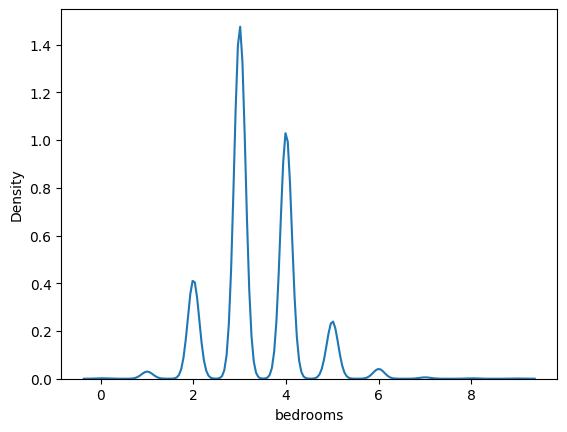

In [24]:
df = df[df["bedrooms"] < 10]
sns.kdeplot(df["bedrooms"])

In [25]:
df = df[df["total_rooms"] < 20]
df = df[df["renovation_age"] > 1500]
df = df[df["sqft_lot15"] < 200000]
df = df[df["sqft_basement"] < 3000]
df = df[df["sqft_above"] < 7000]
df = df[df["sqft_living"] < 8000]
df = df[df["bathrooms"] < 8]


In [26]:
#corr 
abs(df.corr()['price']).sort_values(ascending=False)


price             1.000000
sqft_living       0.692137
grade             0.675147
sqft_above        0.600451
sqft_living15     0.593826
bathrooms         0.513901
total_rooms       0.466348
view              0.383205
lat               0.323761
bedrooms          0.317814
sqft_basement     0.296561
floors            0.261840
waterfront        0.250878
sqft_lot15        0.106527
sqft_lot          0.093274
yr_built          0.082728
age               0.082728
zipcode           0.057378
condition         0.051880
long              0.035247
yr_renovated           NaN
renovation_age         NaN
Name: price, dtype: float64

In [27]:
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'age', 'renovation_age', 'total_rooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

algo_test(X,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.192850e+01,1.395280e+05,7.945127e+04
Gradient Boosting,8.007343e+01,1.465145e+05,8.443590e+04
Linear,6.775144e+01,1.863886e+05,1.192228e+05
Lasso,6.774417e+01,1.864096e+05,1.193588e+05
Ridge,6.774276e+01,1.864137e+05,1.193543e+05
Decision Tree,5.965982e+01,2.084650e+05,1.124039e+05
ElasticNet,5.960029e+01,2.086188e+05,1.393663e+05
Extra Tree,5.397843e+01,2.226614e+05,1.184721e+05
mlp_regressor,5.181874e+01,2.278260e+05,1.547653e+05
AdaBoost,4.930878e+01,2.336849e+05,1.557007e+05


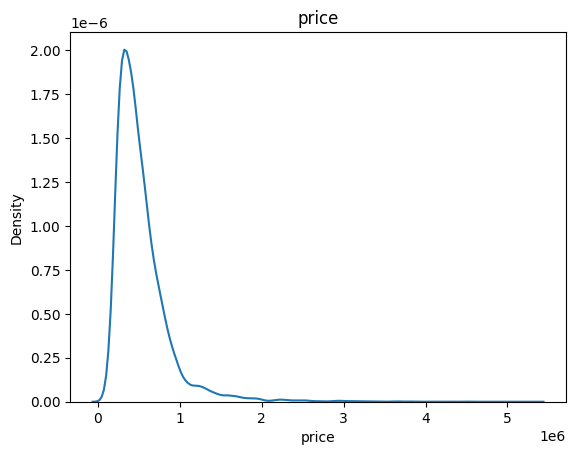

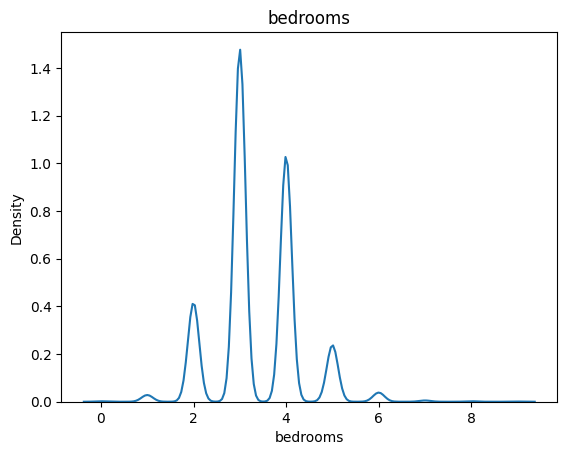

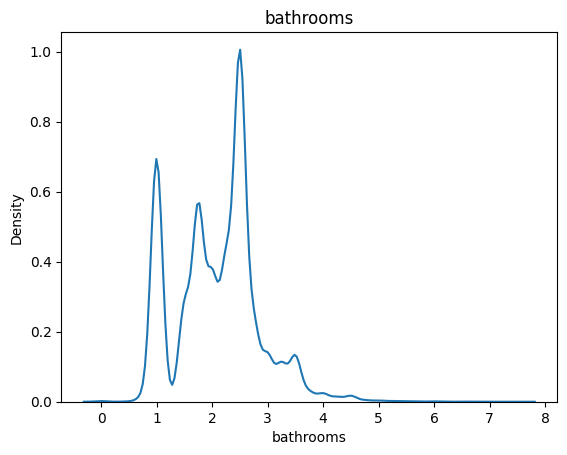

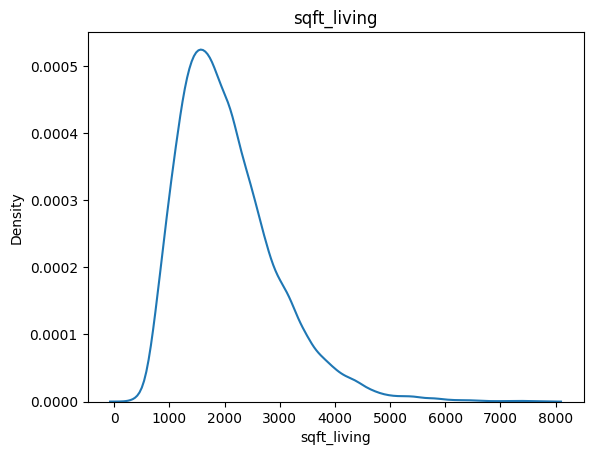

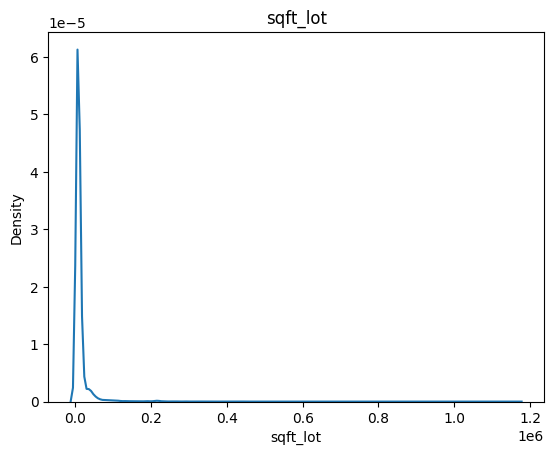

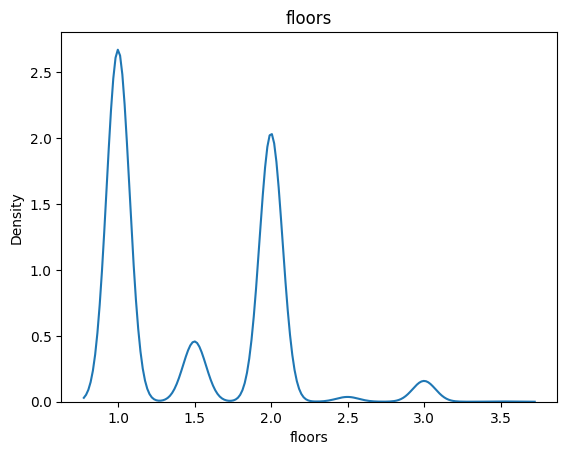

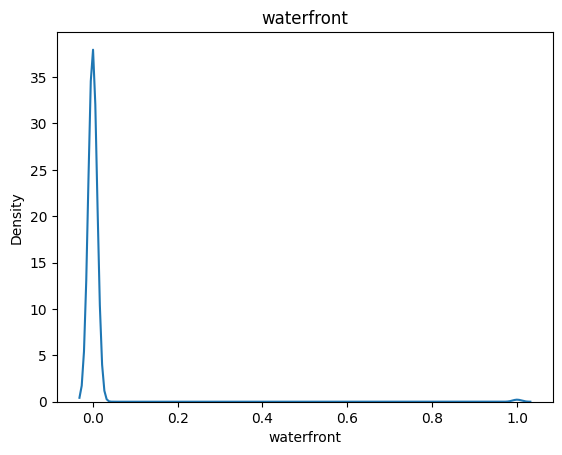

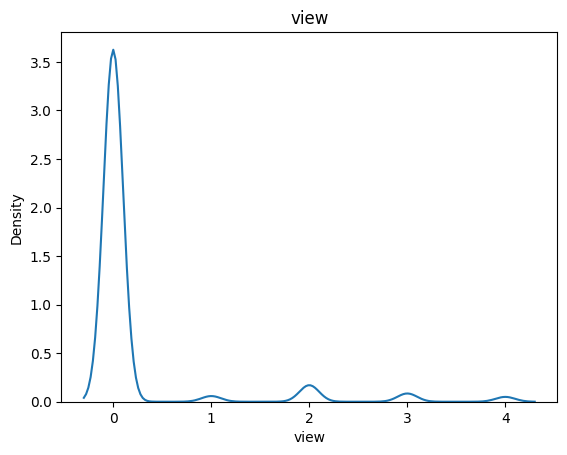

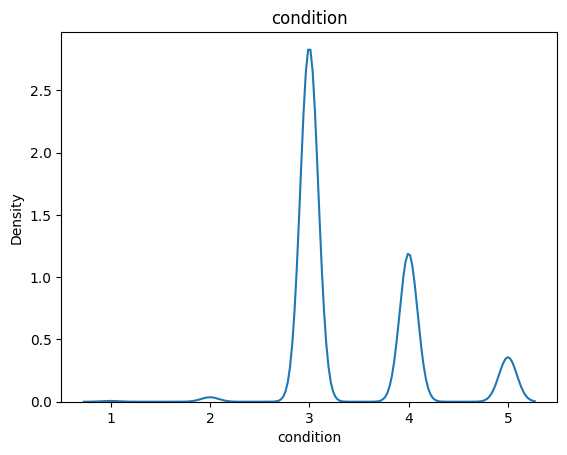

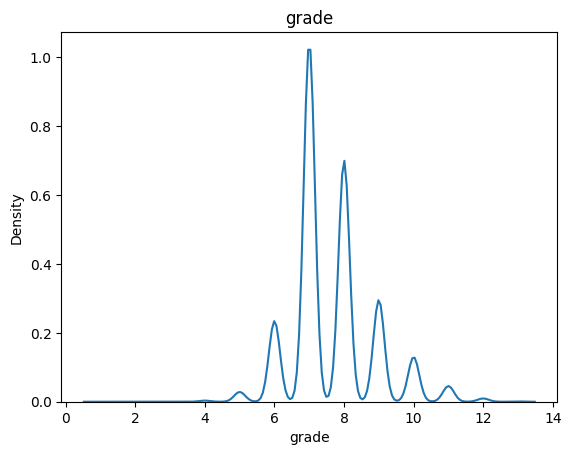

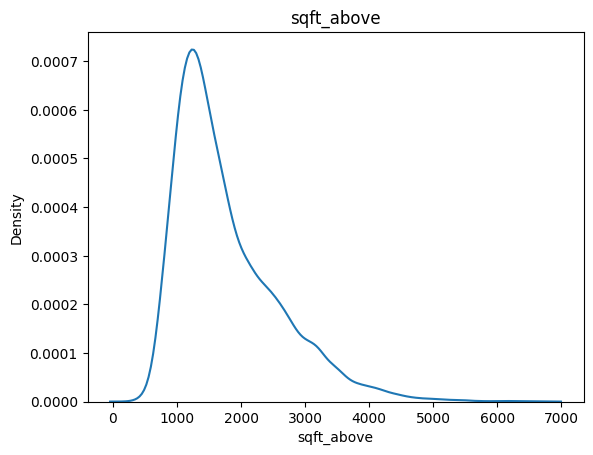

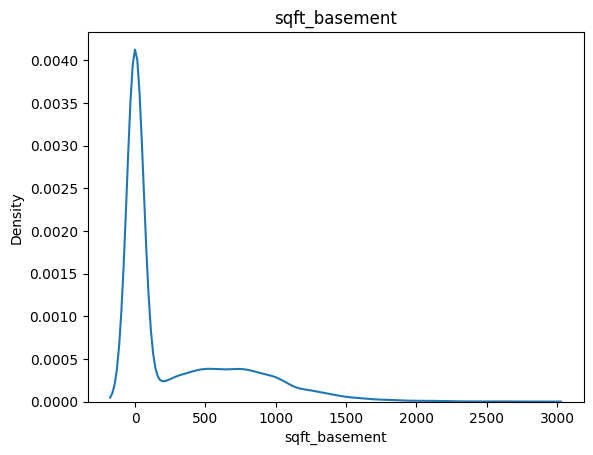

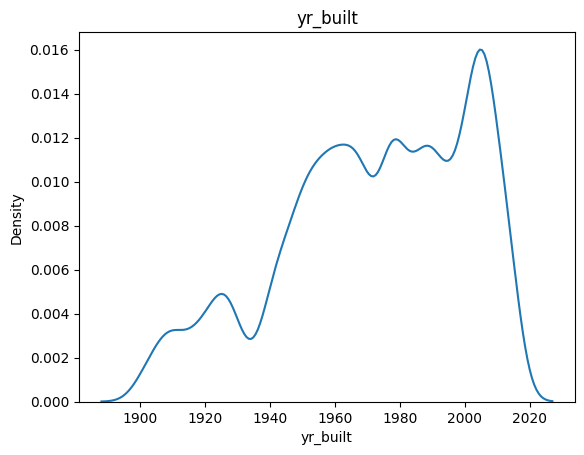

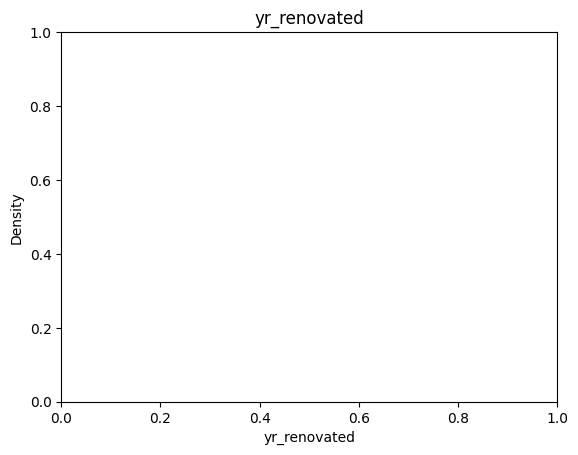

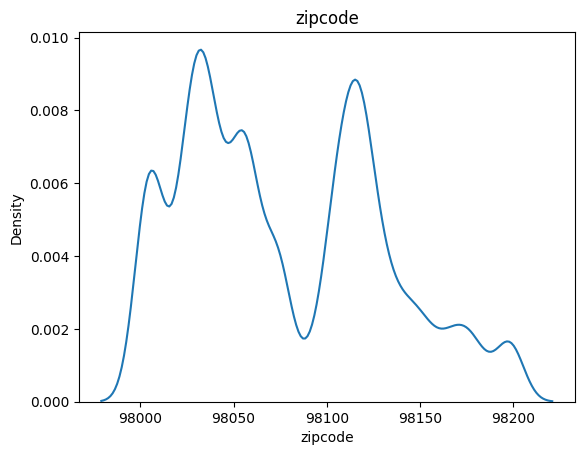

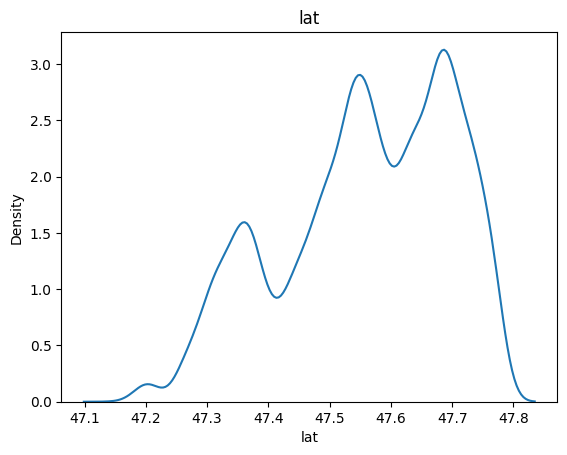

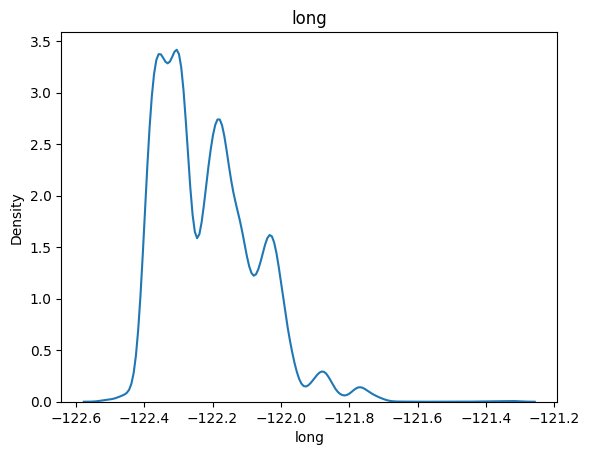

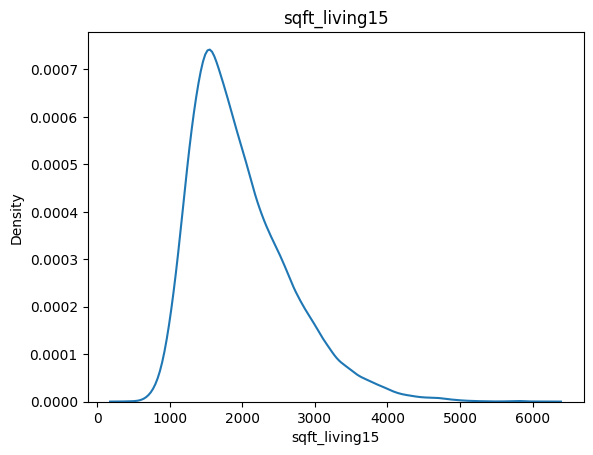

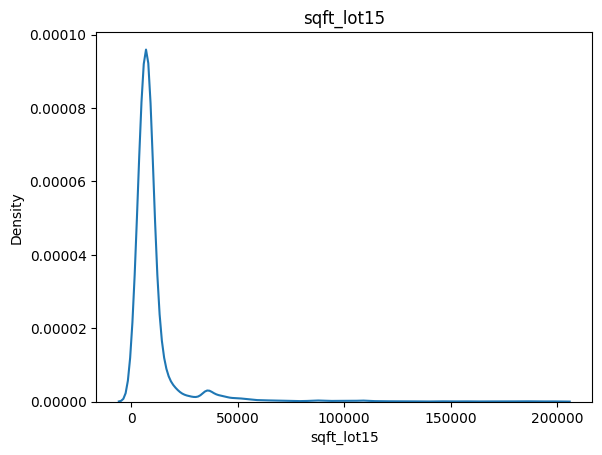

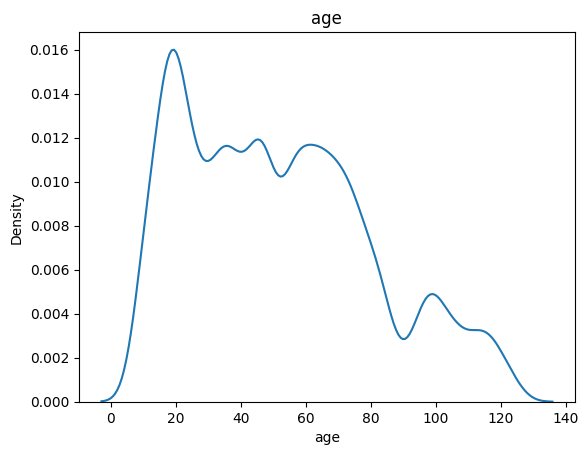

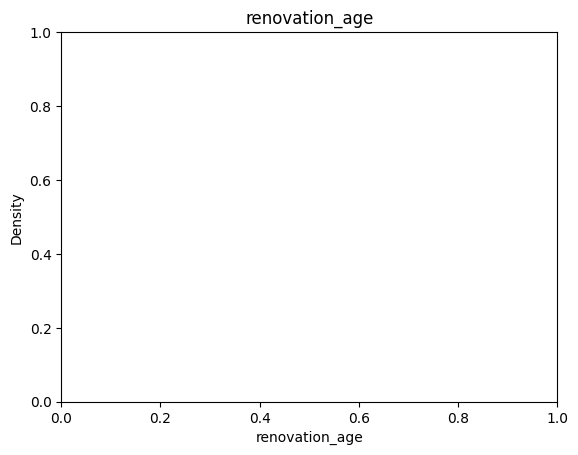

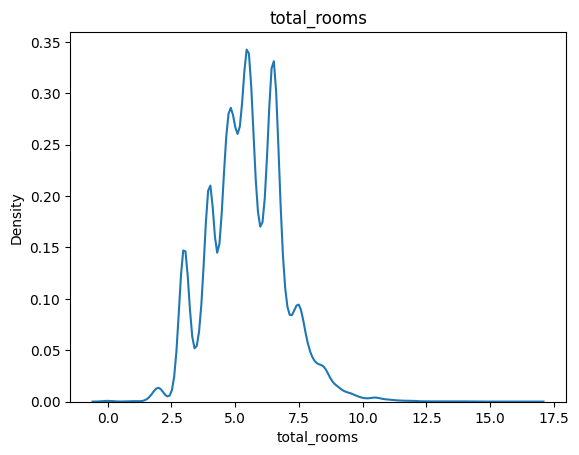

In [28]:
#kde plot every column
for i in df.columns:
    sns.kdeplot(df[i])
    plt.title(i)
    plt.show()


In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovation_age,total_rooms
count,2.052300e+04,20523.000000,20523.000000,20523.000000,2.052300e+04,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.0,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.0,20523.000000
mean,5.277958e+05,3.364469,2.102446,2060.132729,1.314649e+04,1.492521,0.005798,0.213858,3.418506,7.647225,1775.815475,284.317254,1972.271793,0.0,47.559707,-122.213387,1982.103299,10848.657896,51.728207,2024.0,5.466915
std,3.398470e+05,0.896717,0.757474,890.020055,3.187635e+04,0.542246,0.075928,0.728737,0.654851,1.166274,812.027155,433.076882,28.893650,0.0,0.138708,0.139639,680.411943,15601.494263,28.893650,0.0,1.445819
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.0,47.155900,-122.519000,460.000000,651.000000,9.000000,2024.0,0.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.036500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1953.000000,0.0,47.469550,-122.327000,1481.000000,5100.000000,26.000000,2024.0,4.500000
50%,4.458300e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1976.000000,0.0,47.570700,-122.228000,1830.000000,7600.000000,48.000000,2024.0,5.500000
75%,6.300000e+05,4.000000,2.500000,2520.000000,1.048000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,540.000000,1998.000000,0.0,47.678400,-122.125000,2360.000000,10000.000000,71.000000,2024.0,6.500000
max,5.300000e+06,9.000000,7.500000,7730.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,6660.000000,2850.000000,2015.000000,0.0,47.777600,-121.315000,6110.000000,199504.000000,124.000000,2024.0,16.500000


In [30]:
#scaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

algo_test(X,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.192850e+01,1.395280e+05,7.945127e+04
Gradient Boosting,7.995844e+01,1.469366e+05,8.450406e+04
Linear,6.775144e+01,1.863886e+05,1.192228e+05
Lasso,6.774417e+01,1.864096e+05,1.193588e+05
Ridge,6.774276e+01,1.864137e+05,1.193543e+05
Extra Tree,6.377429e+01,1.975480e+05,1.123933e+05
ElasticNet,5.960029e+01,2.086188e+05,1.393663e+05
Decision Tree,5.852161e+01,2.113855e+05,1.134417e+05
mlp_regressor,5.193945e+01,2.275405e+05,1.547323e+05
AdaBoost,4.930878e+01,2.336849e+05,1.557007e+05


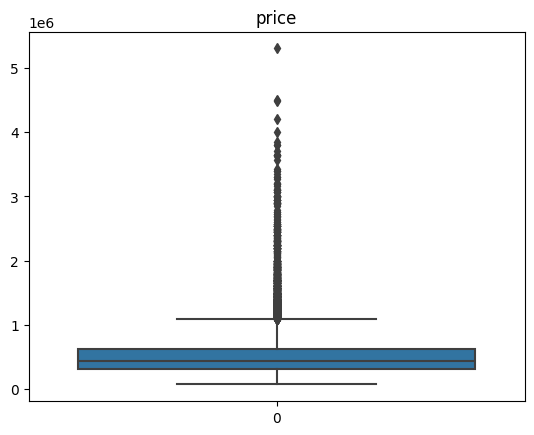

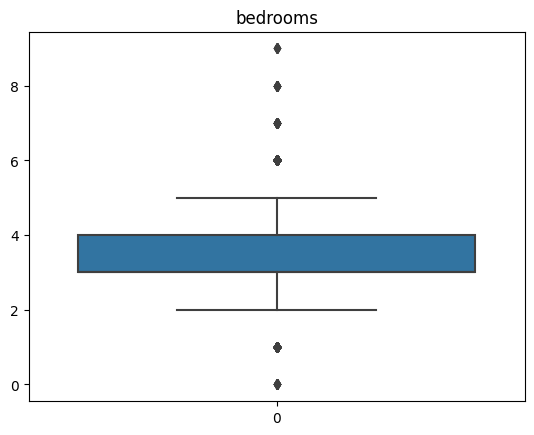

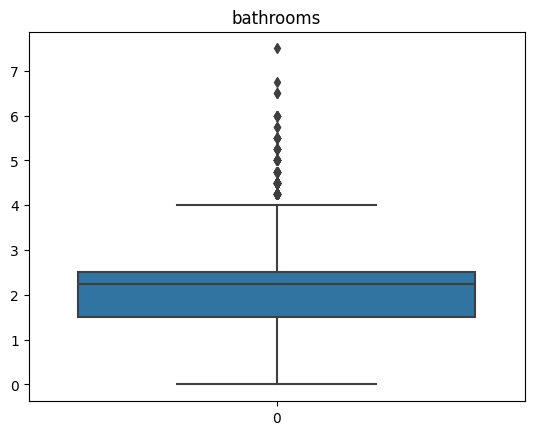

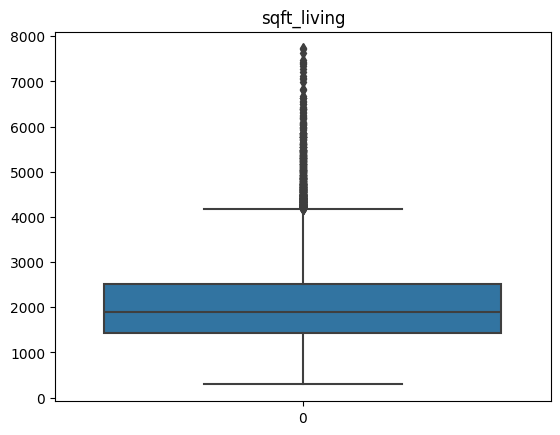

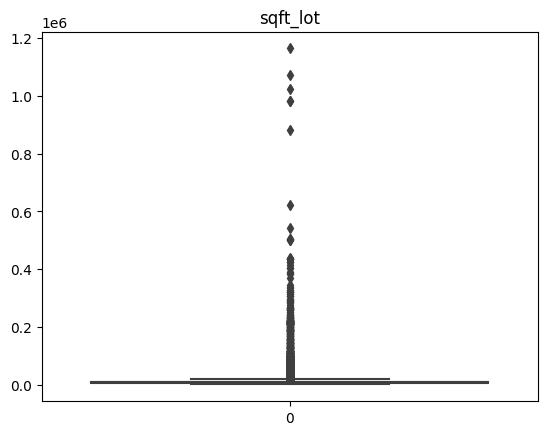

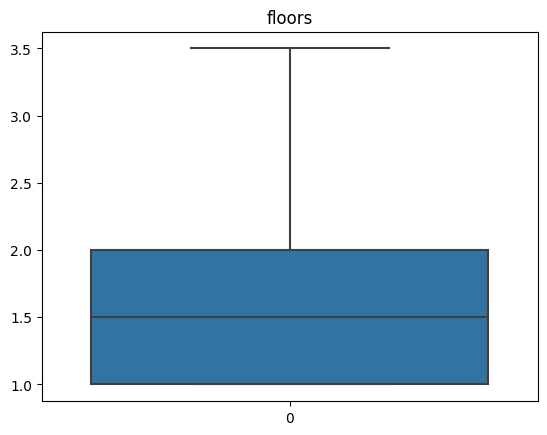

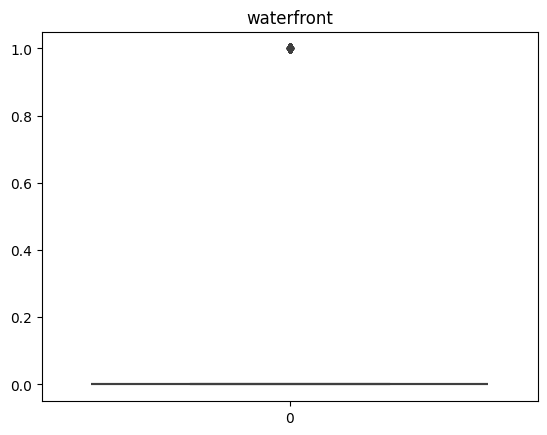

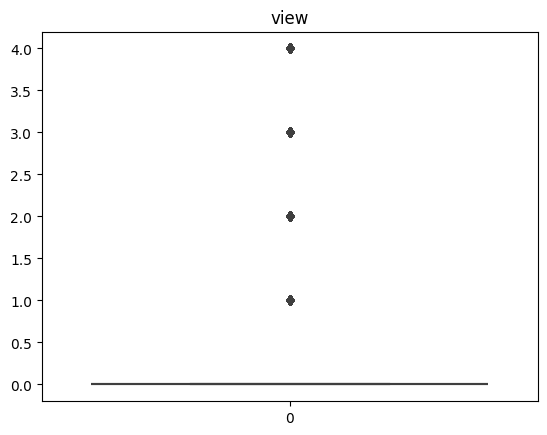

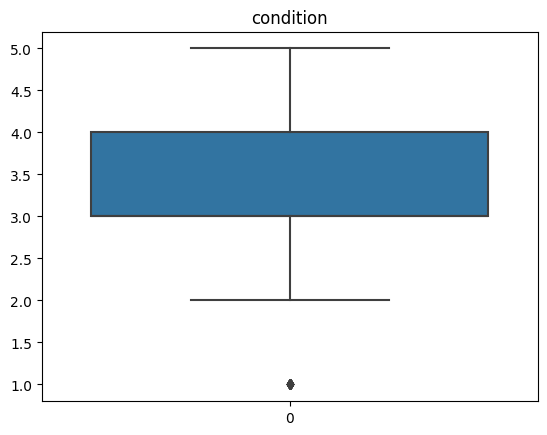

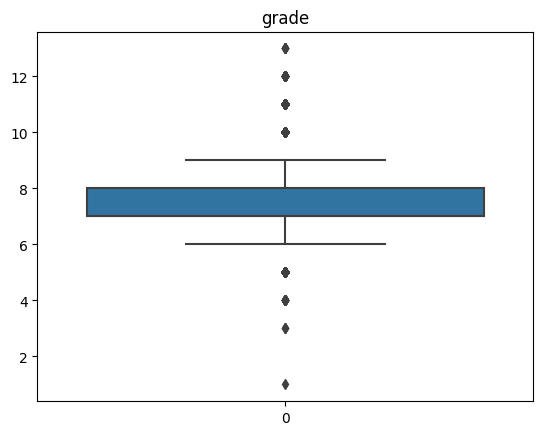

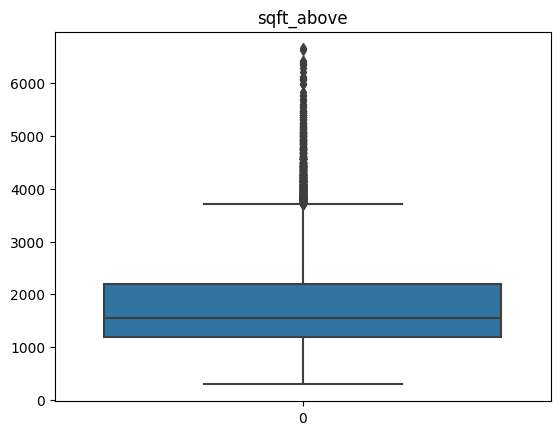

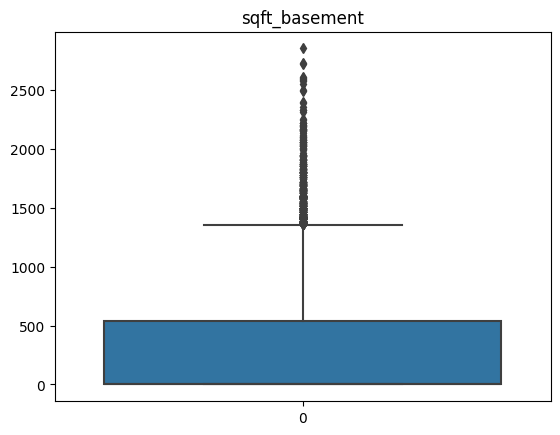

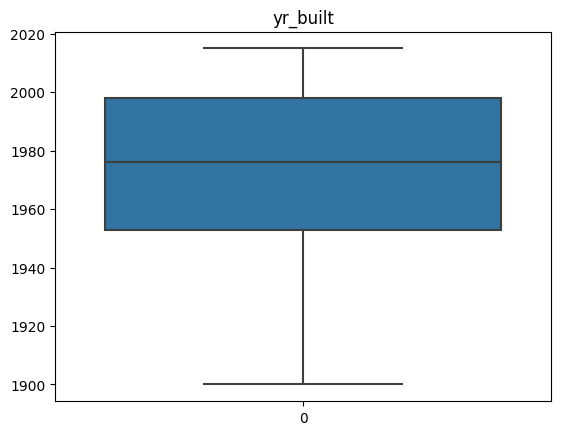

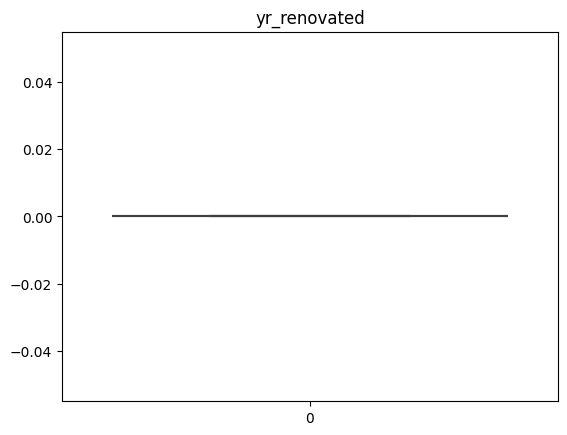

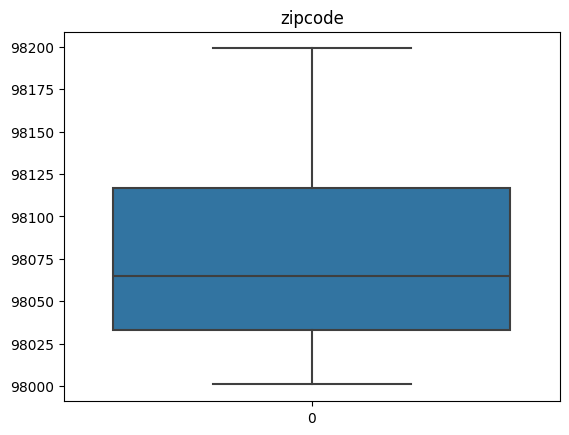

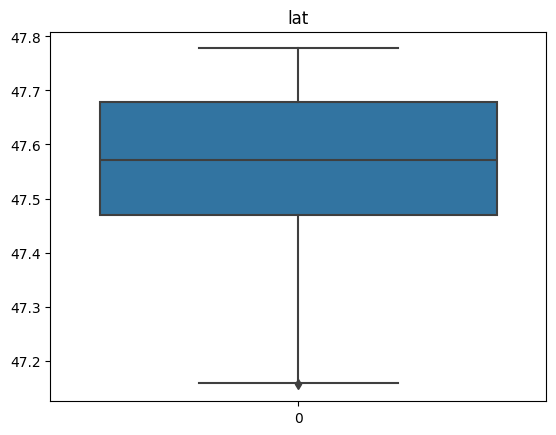

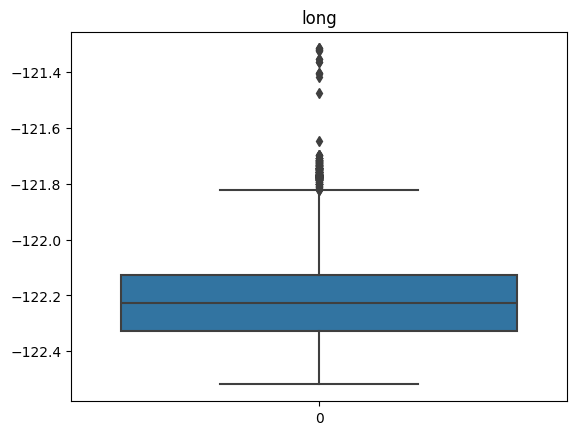

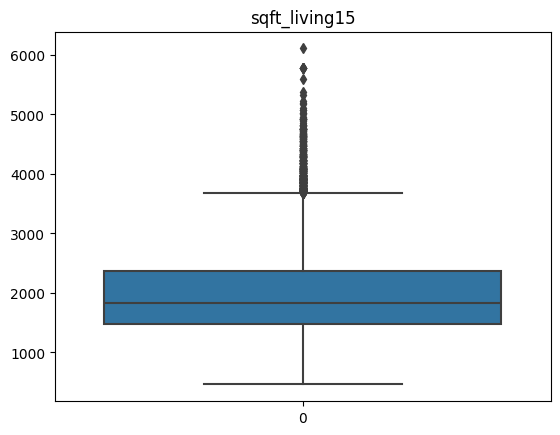

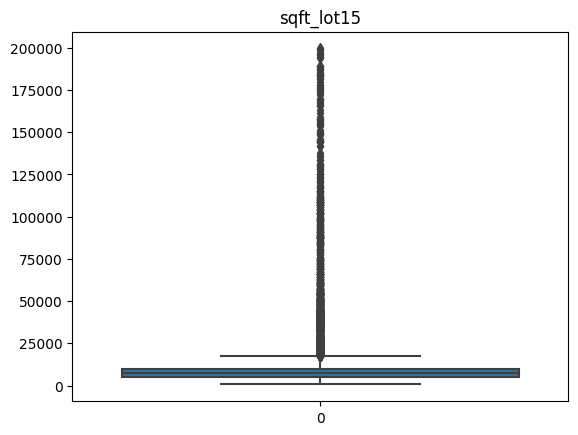

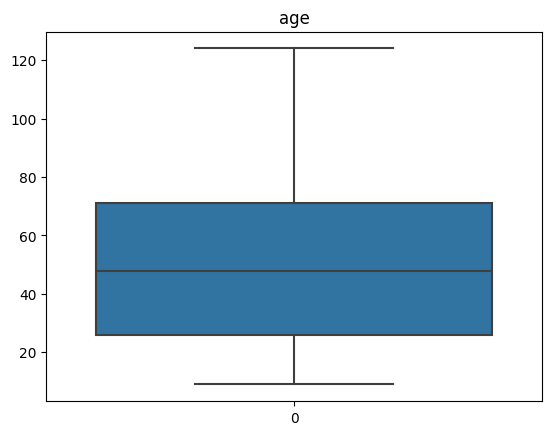

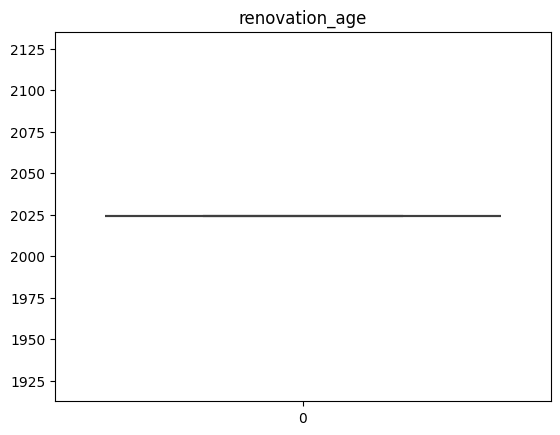

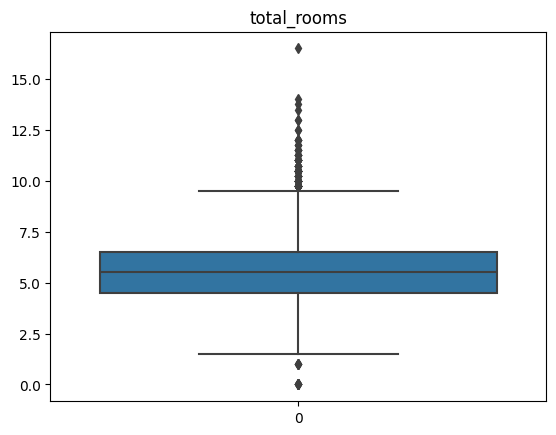

In [31]:
#is there any outlier
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    

In [32]:
#sqftliving
df = df[df["sqft_living"] < 4500]
#sqft basement
df = df[df["sqft_basement"] < 1500]

#sqft_above
df = df[df["sqft_above"] < 3500]

#sqft_living15
df = df[df["sqft_living15"] < 3500]

#sqft_lot15
df = df[df["sqft_lot15"] < 20000]

#sqft_lot
df = df[df["sqft_lot"] < 100000]

#sqft_living
df = df[df["sqft_living"] < 4500]




In [33]:
# corr
abs(df.corr()['price']).sort_values(ascending=False)

price             1.000000
grade             0.602826
sqft_living       0.585613
sqft_living15     0.505141
sqft_above        0.469532
lat               0.408655
bathrooms         0.406149
total_rooms       0.377504
view              0.313226
sqft_basement     0.267062
bedrooms          0.262391
floors            0.247408
waterfront        0.161947
condition         0.084172
long              0.023957
zipcode           0.018217
yr_built          0.008802
age               0.008802
sqft_lot15        0.003812
sqft_lot          0.003241
yr_renovated           NaN
renovation_age         NaN
Name: price, dtype: float64

In [34]:
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'age', 'renovation_age', 'total_rooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

algo_test(X,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.176944e+01,1.006917e+05,6.440460e+04
Gradient Boosting,8.174544e+01,1.007580e+05,6.619023e+04
Lasso,6.524028e+01,1.390374e+05,9.765271e+04
Ridge,6.523871e+01,1.390406e+05,9.764700e+04
Linear,6.523642e+01,1.390452e+05,9.768025e+04
Decision Tree,6.170633e+01,1.459342e+05,8.894510e+04
Extra Tree,5.802212e+01,1.527932e+05,9.293163e+04
ElasticNet,5.236562e+01,1.627623e+05,1.183716e+05
mlp_regressor,4.114678e+01,1.809167e+05,1.342259e+05
AdaBoost,3.807422e+01,1.855792e+05,1.346012e+05


In [35]:
# XGBRegressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**.5)




R2 Score:  0.8107460583548562
RMSE:  101226.51195003273
